In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import gamma

In [122]:
def generation_time(x):
    return gamma.pdf(x, 1.88, scale=1/0.26)

In [132]:
def R_t(I, t):
    num = I[t]
    den = 0
    for s in range(0,t+1):
        den += I[t-s] * generation_time(s)
    return num/den

In [133]:
df_covid = pd.read_csv('data/dpc-covid19-ita-regioni.csv', parse_dates = ['data'])
df_covid = df_covid[df_covid['denominazione_regione'] == 'Lombardia']
df_covid = df_covid[df_covid['data'] < '2020-12-29']
df_covid['data'] = pd.to_datetime(df_covid['data']).dt.date
df_covid = df_covid.drop(columns = ['casi_da_sospetto_diagnostico', 'casi_da_screening', 'tamponi', 'casi_testati', 'note', 'ingressi_terapia_intensiva', 
                                   'note_test', 'note_casi', 'totale_positivi_test_molecolare', 'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
                                   'tamponi_test_antigenico_rapido', 'ricoverati_con_sintomi', 'terapia_intensiva', 'stato', 'isolamento_domiciliare',
                                   'totale_ospedalizzati', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'codice_nuts_1' , 'codice_nuts_2'])

df_covid['recovered_death'] = df_covid['dimessi_guariti'] + df_covid['deceduti']
df_covid = df_covid.reset_index()
df_covid.head(10)

,index,data,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,recovered_death
0,8,2020-02-24,166,0,166,0,6,172,6
1,29,2020-02-25,231,65,68,0,9,240,9
2,50,2020-02-26,249,18,18,0,9,258,9
3,71,2020-02-27,349,100,145,40,14,403,54
4,92,2020-02-28,474,125,128,40,17,531,57
5,113,2020-02-29,552,78,84,40,23,615,63
6,134,2020-03-01,887,335,369,73,24,984,97
7,155,2020-03-02,1077,190,270,139,38,1254,177
8,176,2020-03-03,1326,249,266,139,55,1520,194
9,197,2020-03-04,1497,171,300,250,73,1820,323


In [134]:
I = df_covid['totale_positivi']
N = 9981554

In [181]:
R_t_list = []
for t in range(7,len(xdata)):
    R_t(I, t)
    R_t_list.append(R_t(I, t))

In [182]:
def normalized(x, normalized = True):
    if normalized:
        return (x-min(x))/(max(x)-min(x))
    else:
        return x

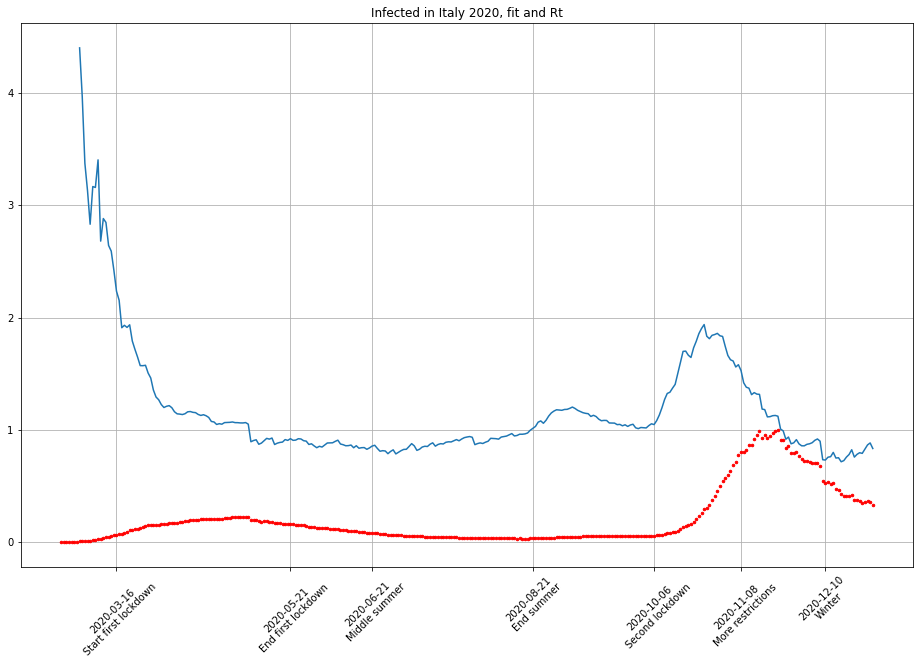

In [185]:
plt.figure(figsize=(16, 10))

plt.plot(xdata, normalized(I), 'r.', markersize=5)
plt.plot(xdata[7:], R_t_list)
plt.title('Infected in Italy 2020, fit and Rt')
plt.xticks([xdata[21], xdata[87],xdata[118],xdata[179],xdata[225],xdata[258],xdata[290]],
           labels=[str(xdata[21]) +'\n'+ 'Start first lockdown',
            str(xdata[87]) +'\n'+ 'End first lockdown',
            str(xdata[118]) +'\n'+ 'Middle summer',
            str(xdata[179]) +'\n'+ 'End summer',
            str(xdata[225]) +'\n'+ 'Second lockdown',
            str(xdata[258]) +'\n'+ 'More restrictions',
            str(xdata[290]) +'\n'+ 'Winter'], rotation = 45,
    fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()